In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random


2022-03-02 16:14:31.690873: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 16:14:31.690942: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data'

In [4]:
number = 10
str(number).zfill(4)

'0010'

In [5]:
def get_dataset(path, sample_size=500, image_size=(64,64), random_seed=1):
    """
    get a dataset of images of required size, randomly selected
    returns X (masked images), y (unmasked images of the same faces), and a sample test set of 5 images
    path to data : ..../raw_data
    the function then completes the path by adding : 64x64/Mask or No_mask (or 256x256/Mask etc.)
    """
    path = f'{path}/{image_size[0]}x{image_size[1]}/'
    print(f'Loading data from {path}...')
    random.seed(random_seed)
    data_size = sample_size
    X = []
    y = []
    X_test = []
    for number in range(data_size):
        rand_img_nb = random.randint(0,9999)
        no_mask_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X.append(mask_im)
        y.append(no_mask_im)
    for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_test.append(mask_im)
    X=np.asarray(X)
    y=np.asarray(y)
    X_test=np.asarray(X_test)
    print('Done')
    print(f'X shape : {X.shape}')
    print(f'y shape : {y.shape}')
    print(f'X_test shape : {X_test.shape}')
    return X, y, X_test

In [6]:
X, y, X_test = get_dataset(path, sample_size= 100, image_size=(64,64), random_seed=5)

Loading data from /home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/...
Done
X shape : (100, 64, 64, 3)
y shape : (100, 64, 64, 3)
X_test shape : (5, 64, 64, 3)


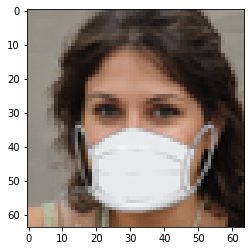

In [7]:
plt.imshow(X_test[0])

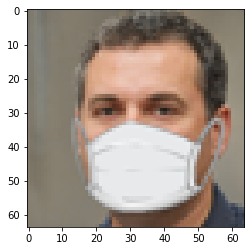

In [8]:
plt.imshow(X[20])

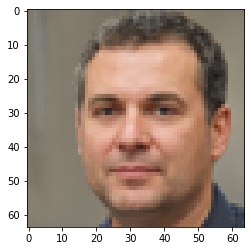

In [9]:
plt.imshow(y[20])

In [10]:
from icangetyoursmile.models import unet

In [11]:
model = unet(input_size=(64,64,3))

2022-03-02 16:14:38.839164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 16:14:38.839237: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 16:14:38.839256: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-02 16:14:38.839604: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
from icangetyoursmile.custom_callbacks import CustomCallback
image_log = dict()
save_predict = CustomCallback(X_test, image_log)

In [13]:
results = model.fit(X, y, batch_size=8, epochs=100, use_multiprocessing=True, callbacks=save_predict)

Epoch 1/100
13/13 [==============================] - 2s 80ms/step - loss: 17471.6484
Epoch 2/100
13/13 [==============================] - 1s 62ms/step - loss: 16345.0859
Epoch 3/100
13/13 [==============================] - 1s 57ms/step - loss: 15957.4160
Epoch 4/100
13/13 [==============================] - 1s 57ms/step - loss: 15715.9229
Epoch 5/100
13/13 [==============================] - 1s 58ms/step - loss: 15537.9951
Epoch 6/100
13/13 [==============================] - 1s 66ms/step - loss: 15395.8262
Epoch 7/100
13/13 [==============================] - 1s 67ms/step - loss: 15275.0098
Epoch 8/100
13/13 [==============================] - 1s 63ms/step - loss: 15168.9336
Epoch 9/100
13/13 [==============================] - 1s 64ms/step - loss: 15077.2002
Epoch 10/100
13/13 [==============================] - 1s 60ms/step - loss: 14987.6191
Epoch 11/100
13/13 [==============================] - 1s 60ms/step - loss: 14901.2588
Epoch 12/100
13/13 [==============================] - 1s 62ms/s

Epoch 45/100
13/13 [==============================] - 1s 61ms/step - loss: 1606.1451
Epoch 46/100
13/13 [==============================] - 1s 58ms/step - loss: 1521.7058
Epoch 47/100
13/13 [==============================] - 1s 58ms/step - loss: 1422.4164
Epoch 48/100
13/13 [==============================] - 1s 56ms/step - loss: 1342.0861
Epoch 49/100
13/13 [==============================] - 1s 57ms/step - loss: 1281.4678
Epoch 50/100
13/13 [==============================] - 1s 57ms/step - loss: 1216.5012
Epoch 51/100
13/13 [==============================] - 1s 58ms/step - loss: 1156.2318
Epoch 52/100
13/13 [==============================] - 1s 56ms/step - loss: 1094.3275
Epoch 53/100
13/13 [==============================] - 1s 58ms/step - loss: 1045.8690
Epoch 54/100
13/13 [==============================] - 1s 59ms/step - loss: 1003.1504
Epoch 55/100
13/13 [==============================] - 1s 56ms/step - loss: 959.8080
Epoch 56/100
13/13 [==============================] - 1s 64ms/step

13/13 [==============================] - 1s 59ms/step - loss: 547.3013
Epoch 90/100
13/13 [==============================] - 1s 60ms/step - loss: 536.8599
Epoch 91/100
13/13 [==============================] - 1s 59ms/step - loss: 533.3792
Epoch 92/100
13/13 [==============================] - 1s 62ms/step - loss: 534.6297
Epoch 93/100
13/13 [==============================] - 1s 61ms/step - loss: 532.8396
Epoch 94/100
13/13 [==============================] - 1s 60ms/step - loss: 524.4664
Epoch 95/100
13/13 [==============================] - 1s 63ms/step - loss: 521.3459
Epoch 96/100
13/13 [==============================] - 1s 61ms/step - loss: 520.9249
Epoch 97/100
13/13 [==============================] - 1s 58ms/step - loss: 520.5110
Epoch 98/100
13/13 [==============================] - 1s 60ms/step - loss: 516.6180
Epoch 99/100
13/13 [==============================] - 1s 60ms/step - loss: 509.2813
Epoch 100/100
13/13 [==============================] - 1s 56ms/step - loss: 511.4385


In [14]:
y_pred = model.predict(X_test).astype(np.uint8)

In [15]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

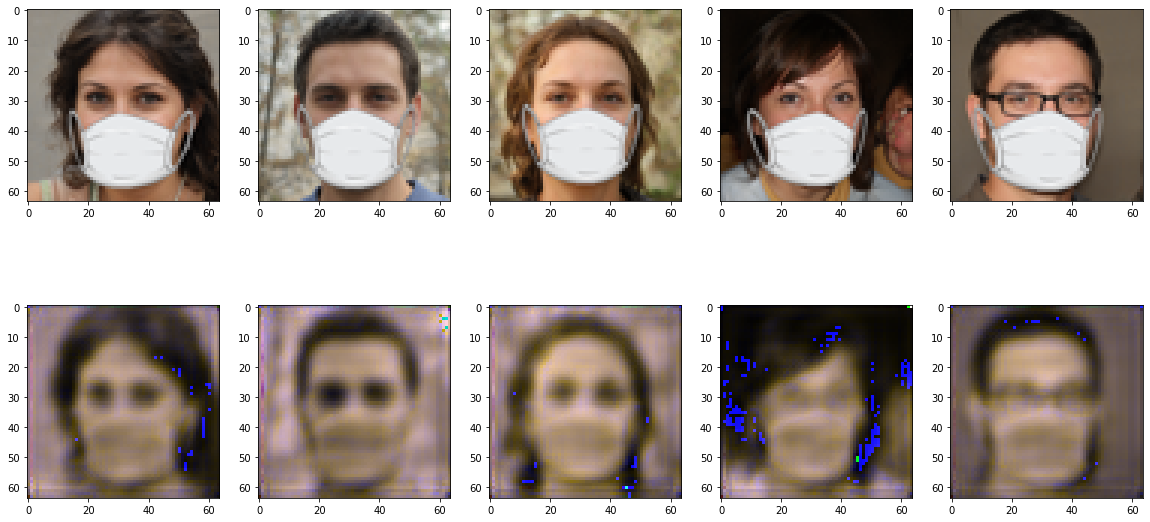

In [16]:
plot_results(X_test, y_pred)

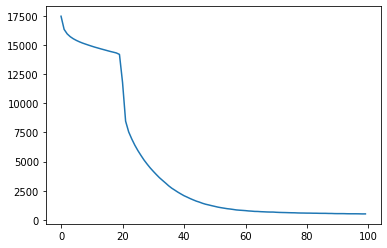

In [17]:
plt.plot(results.history['loss'])

<IPython.core.display.Javascript object>


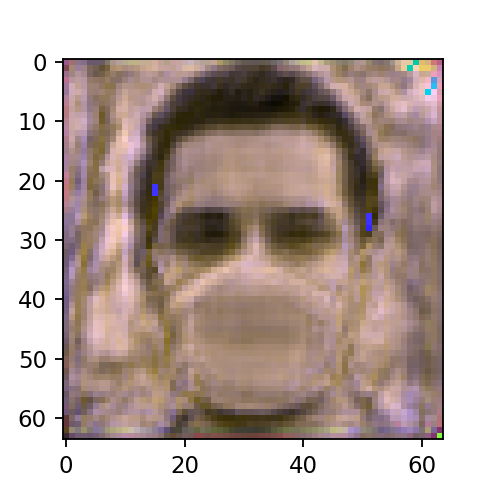

In [227]:
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure(figsize=(3,3))
image_nb = 1
frames = []
for i in range(len(image_log)):
    frames.append([plt.imshow(image_log[i][1],animated=True)])
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)
plt.show()

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
